In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math

import random


givenPoints = np.array ( 
    [[-171.60,4.00,0.00],
[-206.40,4.20,0.00],
[-255.90,0.20,0.00],
[-272.10,-43.90,0.00],
[-205.50,-95.00,0.00],
[-185.50,-142.40,0.00],
[-152.10,-155.00,0.00],
[-101.40,-154.70,0.00],
[-42.80,-117.20,0.00],
[-39.80,-56.80,0.00],#10
[-40.90,-17.10,0.00],
[3.00,-5.70,0.00],
[47.80,-5.80,0.00],
[89.00,-5.50,0.00],
[45.90,-84.90,0.00],#15
[35.30,19.30,0.00],
[36.30,71.20,0.00],
[41.60,155.10,0.00],
[74.00,185.20,0.00],
[148.10,170.30,0.00],#20
[189.20,52.80,0.00],
[174.40,-148.00,0.00],
[10.20,-187.90,0.00],
[-145.80,-190.90,8.60],
[-222.60,35.10,10.00],#25
[-119.40,186.60,10.00],
[84.70,148.10,0.00],
[151.10,116.20,0.00],
[151.40,32.20,0.00],
[124.70,6.90,0.00],#30
[96.20,-28.60,0.00],
[-9.50,-88.30,0.00],
[-83.20,-87.70,0.00],
[-124.30,-42.40,0.00],
[-118.80,31.10,0.00],#35
[-124.40,102.30,0.00],
[-80.20,136.30,0.00],
[-16.70,87.93,0.00],
[25.70,65.40,0.00],
[24.60,-30.70,0.00]
])
edges = np.array([[1,104], 
[104, 2],
[85,1],
[82,85],
[71,82],
[81,71],
[195,41],
[41,81],
[45,195],
[46,45],
[50,46],
[30,50],
[154,30],
[53,55],
[55,58],
[58,38],
[38,62],
[62,65],
[65,120],
[120,123],
[123,113],
[113,115],
[115,175],
[143,15],
[15,136],
[136,32],
[32,76],
[76,79],
[79,33],
[33,92],
[92,95],
[95,101],
[101,102],
[102,173],
[179, 191],
[191, 190],
[190, 181],
[22, 202],
[202, 23],
[23, 24],
[24, 185],
[204,128],
[128, 124],
[124, 198],
[193, 168], 
[168, 166],
[166, 194],
[151, 149],
[27,161],
[159, 27],
[28, 159],
[155,28],
[161,18],
[18, 172],
[2,177],
[199, 125],
[125, 129],
[129, 37],
[176,116],
[116,114],
[114,122],
[122, 121],
[121, 66],
[66, 61],
[61, 60],
[60, 59],
[59, 54],
[54, 52],
[178,105],
[105, 106],
[106, 84],
[84, 83],
[83, 72],
[72, 80],
[80, 12],
[12,196],
[196, 13],
[13, 14],
[14, 49],
[49,153],
[174,5],
[5, 103],
[103, 100],
[100,94],
[94, 93],
[93, 78],
[78, 77],
[77, 137],
[137,138],
[138, 144],
[6,7],
[7, 167],
[167, 169],
[169, 8],
[8, 9],
[150 ,152],
[180,26],
[26, 189],
[189, 192],
[192, 19],
[19, 20],
[186,182],
[182,184],
[184,203],
[203, 183],
[189,187],
[125,126],
[122,119],
[66,67],
[59,39],
[116,111],
[105,170],
[84,89],
[72,73],
[196,43],
[14,31],
[153,156],
[103,132],
[94,96],
[78,134],
[137,141],
[113, 109], 
[120, 117],
[62,64],
[55,57],
[1,108],
[177,207],
[82,87],
[81,69],
[45,16],
[50,48],
[173,197],
[101,130],
[92,91],
[76,75],
[15,139],
[168,98],
[149,148],
[202,201],
[164,160],
[160,158],
[197, 206],
[206, 3],
[3, 207],
[207,176],
[175, 208],
[208, 205],
[205,4],
[4,174],
[206,178],
[185, 25],
[25, 180],
[181, 186],
[109, 199],
[198,110],
[108,112],
[111,107],
[107,170],
[170, 131],
[131,132],
[132, 6],
[194,133],
[133,130],
[110, 115],
[107, 104],
[131, 102],
[133, 100],
[171, 106],
[112,114],
[130, 171],
[171, 108],
[112, 109],
[98, 97],
[97, 91],
[97, 93],
[91, 88],
[126, 36],
[36, 123],
[36, 119],
[119, 86],
[86, 85],
[86, 89],
[89, 34],
[34, 90],
[90, 95],
[90, 96],
[96, 99],
[99, 166],
[88, 83],
[88, 87],
[87, 35],
[35, 118],
[118, 121],
[118, 117],
[117, 127],
[127, 129],
[9,135],
[135, 77],
[135, 75],
[75, 10],
[10, 11],
[11, 80],
[11, 69],
[69, 68],
[68, 61],
[68, 64],
[64, 204],
[37, 63],
[63, 65],
[63, 67],
[67, 70],
[70, 71],
[70, 73],
[73, 74],
[74, 79],
[74, 134],
[134,193],
[187,162],
[162, 163],
[163, 165],
[165, 56],
[56, 58],
[56, 39],
[39, 42],
[42, 195],
[42, 43],
[43, 40],
[40, 140],
[140, 136],
[140, 141],
[141, 145],
[145, 147],
[147, 200],
[200, 23],
[201,146],
[146, 150],
[146, 148],
[148, 142],
[142, 138],
[142, 139],
[139, 44],
[44, 13],
[44,16],
[16, 17],
[17, 54],
[17, 57],
[57, 164],
[164, 18],
[18, 172],
[172, 188],
[188, 192],
[144,49],
[49, 48],
[48, 53],
[52,47],
[47, 46],
[47,31],
[31, 143],
[156,151],
[152,157],
[157,155],
[158, 29],
[110, 111],
[29, 154],
[29, 156],
[20,21],
[21,22],
[183, 179],
[191, 192],
[189, 190],
[202, 203],
[184, 23],


[112,115],
[116, 109],
[110, 114], 
[113, 111],

[171, 104],
[105, 108],
[1, 170],
[107, 106],


[133, 102],
[103,130],
[101,132],
[131,100],

[36,121],
[120,119],
[118,123],
[122,117],

[86, 83],
[82, 89],
[88, 85],
[84, 87],

[97, 95],
[94,91],
[90, 93],
[92, 96],

[62, 67],
[66, 64],
[68, 65],
[63, 61],

[70, 80],
[81, 73],
[72, 69],
[11, 71],

[59, 57],
[55, 39],
[17, 58],
[56, 54],




[135,79],
[78, 75],
[74, 77],
[76, 134],


[142, 136],
[140, 138],
[137, 139],
[15, 141],




[196, 16],
[45, 43],
[44, 195],
[42, 13],

[49, 46],
[47, 49],
[48, 31],
[14, 50],


[128, 126],
[127, 124],


[162, 160],
[161, 163],

[149, 147],
[145, 150],

[99, 169],
[167, 98],

[153, 155],
[157, 154],

[200, 203],
[184, 201],


[191, 187],
[188, 190],

[208, 178],
[177, 205],
])


intersections = np.load("intersections.npy")
#np.save("v5.npy",np.array(intersections))

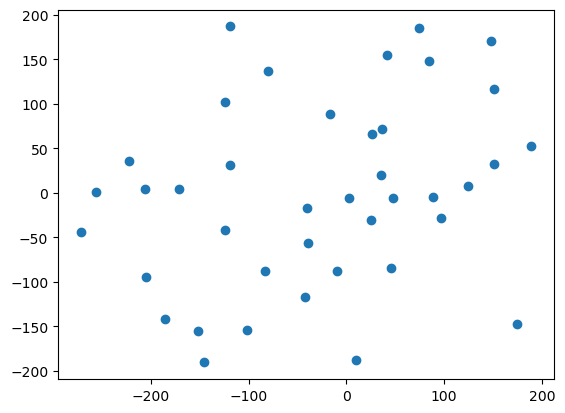

In [3]:
y = givenPoints[:,0:2]


plt.scatter(y[:,0],y[:,1])
plt.show()

In [4]:
def traslate(point,a=1.45,b=399,c =-1.44 ,d =308, scale  = 2):
    x,y = point
    return 2*int (a*x+b) ,  2*int (c*y+d)

In [5]:
def get_point(s):
    s-=1
    if (s>39):
        point = (intersections[s-40][0],intersections[s-40][1])
    else:
        point = (givenPoints[s][0],givenPoints[s][1])
        
    return point
get_point(42)

(27.0, 18.0)

True

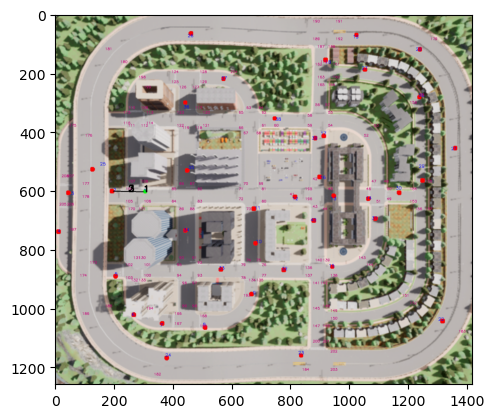

In [10]:
font                   = cv2.FONT_HERSHEY_SIMPLEX
bottomLeftCornerOfText = (10,500)
fontScale              = 0.5
fontColor              = (255,0,0)
thickness              = 1
lineType               = 1


def plotImg(mainPointsText = True, mainPointsCircles = False, interPointsText= True, interPointsCircles = False, showEdges= True, Path = np.array([])):
    img = cv2.imread("img.png")


    
    scale_percent = 200 # percent of original size
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)
    
    # resize image
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

    c = 1

    for x,y,_ in givenPoints:
        x,y = traslate(point=(x,y))

        bottomLeftCornerOfText = (x,y)
        
        if mainPointsText == True:
            cv2.putText(img, str(c), bottomLeftCornerOfText, font,fontScale,fontColor,thickness, lineType)
        
        if mainPointsCircles == True:
            img = cv2.circle(img, (x, y), 3, (00,255,255), 2)
        c+=1




    imgcopy = img
    if showEdges == True:
        for s,d in edges:    
            cv2.line(imgcopy, traslate(point= get_point(s)), traslate(point= get_point(d)), (0,0,0), 2)
        
    for x,y in intersections:
        x,y = traslate(point= (x, y))

        bottomLeftCornerOfText = (x,y)
        

        if interPointsCircles == True:
            cv2.circle(imgcopy, (x, y), 3, (00,255,255), 2)
        
        if interPointsText == True:
            cv2.putText(imgcopy, str(c), bottomLeftCornerOfText, font,fontScale*0.8,(120,0,200),thickness, lineType)
        
        c+=1
        
                
    if Path.shape[0]> 0 :
        n = Path.shape[0]
        c = 1
        for i in range (-1,n):
            if (i==-1):
                s=1
                d= int (Path[i+1])
            elif i==n-1:
                s =  int (Path[i])
                d = int (1)
            else:
                s =  int (Path[i])
                d = int (Path[i+1])

            sx, sy = traslate(point= get_point(s))
            dx, dy = traslate(point= get_point(d))
            
            center = (int ((sx+dx)/2) , int ((sy+dy)/2))
            cv2.putText(imgcopy, str(c), center, font,fontScale*2,(0,0,0),thickness*4, lineType)

            cv2.line(imgcopy, (sx,sy), (dx,dy), (0,0,0), 2)
            c+=1

    return imgcopy


img  = plotImg ( mainPointsText = True, mainPointsCircles = False, interPointsText= True, interPointsCircles = False, showEdges= False, Path=np.array([1,2]))
plt.imshow(img[:,:,::-1])
cv2.imwrite('out.png', img)
    

In [33]:
graphList = {}


for s, d in edges:
    
    dis = math.dist(get_point(s),get_point(d))
    if str(s) in graphList and  str(d) in graphList:
        graphList[str(s)].append((d,dis))
        #graphList[str(d)].append((s,dis))
        
    elif str(s) in graphList:
        graphList[str(s)].append((d,dis))
       # graphList[str(d)] = [(s,dis)]
    elif str(d) in graphList: 
       # graphList[str(d)].append((s,dis))
        graphList[str(s)] = [(d,dis)]     
    else:
        graphList[str(s)] = [(d,dis)]
      #  graphList[str(d)] = [(s,dis)]   
        
print( (graphList["28"]))            
    

[(159, 1.360147050873538)]


In [34]:
TotalNodeCount = givenPoints.shape[0] + intersections.shape[0]

graphMarix = np.ones(shape = (TotalNodeCount+1,TotalNodeCount+1), dtype=float)
graphMarix = graphMarix * float('inf')

for s, d in edges:
    dis = math.dist(get_point(s),get_point(d))
    
    graphMarix[s][d] = dis
    graphMarix[d][s] = dis

np.fill_diagonal(graphMarix,0)
graphMarix[0][0] = float('inf')


print(graphMarix[10][11])




39.71523637094458


In [35]:
dp = graphMarix

next =  np.ones(shape = (TotalNodeCount+1,TotalNodeCount+1), dtype=int)
next = next * -1

for j in range (1, TotalNodeCount+1):
    for i in range (1, TotalNodeCount+1):
        if (dp[j][i] != float('inf') ):
            next[j][i] = i 


In [36]:
for k in range (1, TotalNodeCount+1):
    for j in range (1, TotalNodeCount+1):
        for i in range (1, TotalNodeCount+1):
            if (dp[j][k]  + dp[k][i] < dp[j][i] ):
               dp[j][i] =  dp[j][k]  + dp[k][i]
               next[j][i] = next[j][k]      
                

In [61]:
def getPath(start, end, ans = None):
    if (ans == None):
        ans = [start]
    else:
        ans.append(start)

    if (start == end):
        return np.array (ans)
    start = next[start][end]
    return getPath(start, end,ans)

    
x = getPath(start = 15, end =27, ans = None)
print (x)

[ 15 139  44  16  17  57 164  18 161  27]


In [38]:
def caclCostOrder (order):
    
    n = order.shape[0]
    ans = 0.0
    for i in range(n-1):
        ans+= dp[order[i]][order[i+1]]
        
    
    
    return 1000.0/ans +0.0001

'''
def pelanty (prev, cur, nex):
    pathPrevCur = getPath(start = prev, end =cur, ans = None)
    
    p = dp[prev][cur] + dp[prev][cur]
    prev = pathPrevCur[pathPrevCur.shape[0]-2]
    nex = next[cur][nex]
    x0, y0 = get_point(prev)
    x1, y1 = get_point(cur)
    x2, y2 = get_point(nex)

    ans = 0.0

    
    if abs(y1- y0) < 20 and abs(y2 - y1) < 20 and (x1- x0) *(x2 - x1) < 0:
        ans+=p

    if abs(x1- x0) < 20 and abs(x2 - x1) < 20 and (y1- y0) *(y2 - y1) < 0:
        ans+=p
    return ans*'''

    
def caclCostOrderCircle(order):
    global gmin
    global gorder
    ans = 0.0

    n = order.shape[0]
    
    for i in range(n-1):
        ans+= dp[order[i]][order[i+1]]

        '''if (i==0):
            ans += pelanty (1, order[i], order[i+1])
        elif (i==n-1):
            ans += pelanty (order[i-1], order[i], 1)
        else:
            ans += pelanty (order[i-1], order[i],order[i+1])'''

 
        
    ans+= dp[1][order[0]] + dp[1][order[n-1]] 
    
    
    if (ans < gmin):
        gorder= order
        gmin = ans


    return 1/ans


In [12]:
NofPop =  200



#SizeOfP = 40


gorder= np.array([18, 27, 20, 36, 25, 2, 8, 34, 11, 12, 13, 16, 15, 23, 4 ])
#gorder =np.arange(2,SizeOfP+1)
SizeOfP = gorder.shape[0]+1
gmin = float('inf') 
caclCostOrderCircle(gorder)
#


SizeOfP

NameError: name 'caclCostOrderCircle' is not defined

In [40]:


def firstGen ():
    population = np.ndarray(shape = (NofPop,SizeOfP-1),dtype = int)
    cost =  np.ndarray( NofPop, dtype=float)
    ordered = gorder
    
    
    for i in range(NofPop):
        shuffeled = ordered
        np.random.shuffle(shuffeled)

        
        for k in range (SizeOfP):
            if (random.uniform(0, 1) < 0.1):
                x = random.randrange(SizeOfP-1)
                y = (x+1) % (SizeOfP-1)
                shuffeled[y], shuffeled[x] =shuffeled[x], shuffeled[y]

        population[i]= shuffeled 
   
        cost[i] = caclCostOrderCircle(shuffeled) 

        #population[i] = gmin

        #cost[i] = caclCostOrderCircle(population[i]) 

        
    NormCost = (cost/cost.sum(axis=0,keepdims=1))**60
    NormCost = NormCost/NormCost.sum(axis=0,keepdims=1)
    return population , NormCost 


In [41]:
population , NormCost  = firstGen()



In [43]:
def pickOne (population, NormalizedArrayOfProbalites):

    idx = 0
    r = random.uniform(0, 1)
    

    while (r >= 0):
        r = r - NormalizedArrayOfProbalites[idx]
        idx+=1    
    return population[min(idx,NofPop-1)]
    

In [44]:
def crossOver (orderA,orderB):
    start = random.randrange(SizeOfP -2)
    end = random.randrange(start +1 , SizeOfP+1)
    
    orderA = orderA[start:end+1]

    for i in range (SizeOfP-1):
        if (not (orderB[i]  in orderA)):
            orderA = np.insert(orderA, orderA.shape[0], orderB[i])
    return orderA
        

In [45]:
def genNewGen (population, NormalizedArrayOfProbalites):
    
    newpopulation = np.ndarray(shape = (NofPop,SizeOfP-1),dtype = int)
    newNormalizedArrayOfProbalites =  np.ndarray( NofPop, dtype=float)
    
    for i in range(NofPop):
        orderA =   pickOne (population, NormalizedArrayOfProbalites)
        orderB =  pickOne (population, NormalizedArrayOfProbalites)
 
        
        order = crossOver (orderA,orderB)

        
      
        for k in range (SizeOfP):
            if (random.uniform(0, 1) < 0.3):
                x = random.randrange(SizeOfP-1)
                y = (x+1) % (SizeOfP-1)
                order[y], order[x] = order[x], order[y]


        newpopulation[i] = order
        newNormalizedArrayOfProbalites[i] = caclCostOrderCircle(order )
    
    newNormalizedArrayOfProbalites =( newNormalizedArrayOfProbalites/newNormalizedArrayOfProbalites.sum(axis=0,keepdims=1))**60
    newNormalizedArrayOfProbalites = newNormalizedArrayOfProbalites/newNormalizedArrayOfProbalites.sum(axis=0,keepdims=1)
        
    return population, newNormalizedArrayOfProbalites

In [46]:
for i in range (2):
   population , NormCost  = genNewGen (population , NormCost)
   
print(gmin)

3633.507506212956


In [47]:

import threading                                                                

def process(Oldpopulation , OldCost, Newpopulation , NewCost, start, end): 
    
    for i in range(start,end):                                                
        orderA =   pickOne (Oldpopulation, OldCost)
        orderB =  pickOne (Oldpopulation, OldCost)
 
        
        order = crossOver (orderA,orderB)

    
      
        for k in range (SizeOfP):
            if (random.uniform(0, 1) < 0.3):
                x = random.randrange(SizeOfP-1)
                y = (x+1) % (SizeOfP-1)
                order[y], order[x] = order[x], order[y]


        Newpopulation[i] = order
        NewCost[i] = caclCostOrderCircle(order )
        
        

def split_processing(Oldpopulation , OldCost, Newpopulation , NewCost, num_splits=4):                                      
    split_size = Oldpopulation.shape[0]// num_splits                                       
    threads = []                                                                
    for i in range(num_splits):                                                 
        # determine the indices of the list this thread will handle             
        start = i * split_size                                                  
        # special case on the last chunk to account for uneven splits           
        end = NofPop if i+1 == num_splits else (i+1) * split_size                 
        # create the thread                                                     
        threads.append(                                                         
            threading.Thread(target=process, args=(Oldpopulation , OldCost, Newpopulation , NewCost, start, end)))         
        threads[-1].start() # start the thread we just created                  

    # wait for all threads to finish                                            
    for t in threads:                                                           
        t.join()                                                           

In [48]:
'''
for i in range (1):
    Newpopulation = np.ndarray(shape = (NofPop,SizeOfP-1),dtype = int)
    NewCost =  np.ndarray( NofPop, dtype=float)
    
    #population , NormCost  = genNewGen (population , NormCost)

    split_processing (population , NormCost, Newpopulation , NewCost, num_splits=2)

    population , NormCost  = Newpopulation, NewCost / NewCost.sum(axis=0,keepdims=1)'''



'\nfor i in range (1):\n    Newpopulation = np.ndarray(shape = (NofPop,SizeOfP-1),dtype = int)\n    NewCost =  np.ndarray( NofPop, dtype=float)\n    \n    #population , NormCost  = genNewGen (population , NormCost)\n\n    split_processing (population , NormCost, Newpopulation , NewCost, num_splits=2)\n\n    population , NormCost  = Newpopulation, NewCost / NewCost.sum(axis=0,keepdims=1)'

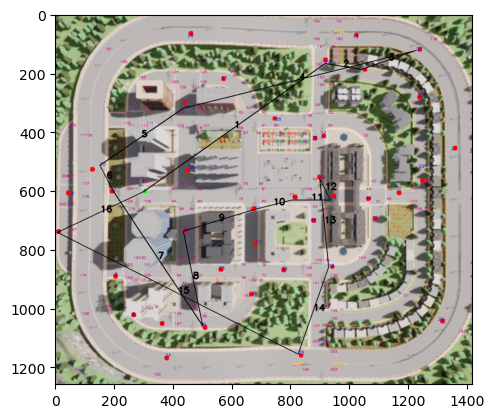

In [14]:
img  = plotImg ( mainPointsText = True, mainPointsCircles = False, interPointsText= True, interPointsCircles = False, showEdges= False, Path=gorder)


plt.imshow (img[:,:,::-1])

In [51]:
cv2.namedWindow('img')
c = 0
while True:

    global population
    global NormCost
    
    
    genNewGen (population , NormCost)
    
    '''Newpopulation = np.ndarray(shape = (NofPop,SizeOfP-1),dtype = int)
    NewCost =  np.ndarray( NofPop, dtype=float)
    split_processing (population , NormCost, Newpopulation , NewCost, num_splits=8)
    population , NormCost  = Newpopulation, NewCost 
   

    NormCost =( NormCost/NormCost.sum(axis=0,keepdims=1))**20
    NormCost = NormCost/NormCost.sum(axis=0,keepdims=1)'''

    c+=1
    
    img =  plotImg ( mainPointsText = True, mainPointsCircles = False, interPointsText= True, interPointsCircles = False, showEdges= False, Path=gorder)
    cv2.putText(img, "iteration: " + str(c)+ "  min dis: " + "{:.2f}".format(gmin), (20,40), font,fontScale*2,(0,0,0),thickness*5, lineType)
    
    A, B = dim 
    
    imgcopy = cv2.resize(img, (int (A/2), int (B/2)), interpolation = cv2.INTER_AREA)
    
    cv2.imshow('img',imgcopy)

    k = cv2.waitKey(1)
    if k==ord('q'):
        break
  

cv2.destroyAllWindows()

print(gorder)
#[11 16 13 12 27 18 20 25 23 15 36  4  8 34  2]

[ 4 36 20 25 23  8 34 12 13 16 15 27 18 11  2]


In [52]:
print(gorder)

#gorder = np.insert(gorder, 0, 1)
#gorder = np.insert(gorder, gorder.shape[0], 1)

print (gorder)

[ 4 36 20 25 23  8 34 12 13 16 15 27 18 11  2]
[ 4 36 20 25 23  8 34 12 13 16 15 27 18 11  2]


In [56]:
finalpath = getPath(1, gorder[0], ans = None)

n = gorder.shape[0]

for i in range (n-1):
    finalpath = np.concatenate( (finalpath, getPath( gorder[i],gorder[i+1], ans = None)), axis=None  )

finalpath = np.concatenate( (finalpath, getPath( gorder[n-1],1, ans = None)), axis=None  )  
print(finalpath)
    


[  1 104   2 177 205   4   4 205 208 175 115 113 123  36  36 121  66  61
  60  59  57 164  18 172 188 192  19  20  20  19 192 189  26 180  25  25
 185  24  23  23 200 147 145 141 137  77 135   9   8   8 169  99  96  90
  34  34  89  84  83  72  80  12  12 196  13  13  44  16  16  44 139  15
  15 139  44  16  17  57 164  18 161  27  27 161  18  18 164  57  17  16
 196  12  80  11  11  71  82  85   1 104   2   2 104   1]


In [57]:
newfinalPath = np.array([])


for i in range (finalpath.shape[0]):
    if (newfinalPath.shape[0] == 0 or finalpath[i]!= newfinalPath [ newfinalPath.shape[0] -1]):
        newfinalPath = np.insert(newfinalPath, newfinalPath.shape[0], finalpath[i])
    

finalpath= newfinalPath
finalpath

array([  1., 104.,   2., 177., 205.,   4., 205., 208., 175., 115., 113.,
       123.,  36., 121.,  66.,  61.,  60.,  59.,  57., 164.,  18., 172.,
       188., 192.,  19.,  20.,  19., 192., 189.,  26., 180.,  25., 185.,
        24.,  23., 200., 147., 145., 141., 137.,  77., 135.,   9.,   8.,
       169.,  99.,  96.,  90.,  34.,  89.,  84.,  83.,  72.,  80.,  12.,
       196.,  13.,  44.,  16.,  44., 139.,  15., 139.,  44.,  16.,  17.,
        57., 164.,  18., 161.,  27., 161.,  18., 164.,  57.,  17.,  16.,
       196.,  12.,  80.,  11.,  71.,  82.,  85.,   1., 104.,   2., 104.,
         1.])

89


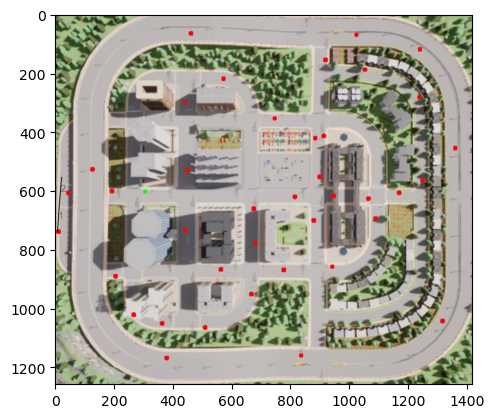

In [64]:
img = cv2.imread("img.png")

scale_percent = 200 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
  
# resize image
img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

#finalpath =  np.array([1,5,6])
n = finalpath.shape[0]

imgcopy = img
c = 1

print(n)

for i in range (5,7):
    
    s =  int (finalpath[i])
    d = int (finalpath[i+1])
    sx, sy = traslate(point= get_point(s))
    dx, dy = traslate(point= get_point(d))
    
    center = (int ((sx+dx)/2) , int ((sy+dy)/2))
    cv2.putText(imgcopy, str(c), center, font,fontScale*2,(0,0,0),thickness, lineType)

    cv2.line(imgcopy, (sx,sy), (dx,dy), (0,0,0), 2)
    c+=1

cv2.imwrite('path.png', imgcopy)

plt.imshow(imgcopy[:,:,::-1])

In [114]:
'''
def add(x, y):
    global intersections
    intersections = np.vstack([intersections, [x,y]])
    return


def nothing(y):
    pass



cv2.namedWindow('img')

x=0.0
y=0.0



while True:
    k = cv2.waitKey(1)
    
    if k==ord('w'):
        y+=3
    elif k==ord('s'):
        y+=-3
        
    if k==ord('d'):
        x+=3
    elif k==ord('a'):
        x+=-3
    
    
    imgr = cv2.imread("img.png")
    
    for q,w,_ in givenPoints:
        q,w = traslate(point=(q,w))

        bottomLeftCornerOfText = (q+4,w+4)

        imgr = cv2.circle(imgr, (q, w), 3, (00,255,255), 2)
    

  

    

    myX = int(x)
    myY = int (y)
    
    cv2.line(imgr,   traslate(point = (myX+10,myY)  )         ,     traslate(point = (myX-10,myY)  )     , (0,0,0), 2)
    cv2.line(imgr,  traslate(point = (myX,myY+10)  )         ,     traslate(point = (myX,myY-10)  ) , (0,0,0), 2)

    


    for i,j in intersections:
        imgr = cv2.circle(imgr, traslate (point=(i, j)), 3, (255, 255, 0), 2)

    
    cv2.imshow('img',imgr)

    
    if k==ord('q'):
        break
    elif k==ord('u'):
        add(x,y)

cv2.destroyAllWindows()

np.save("path_waypoints.npy",np.array(intersections))

print(intersections)'''

'\ndef add(x, y):\n    global intersections\n    intersections = np.vstack([intersections, [x,y]])\n    return\n\n\ndef nothing(y):\n    pass\n\n\n\ncv2.namedWindow(\'img\')\n\ncv2.createTrackbar(\'x\', \'img\',-300,600,nothing)\ncv2.createTrackbar(\'y\', \'img\',-300,600,nothing)\n\n\nwhile True:\n    x = cv2.getTrackbarPos(\'x\', \'img\')-300\n    y = cv2.getTrackbarPos(\'y\', \'img\')-300\n\n\n    imgr = cv2.imread("img.png")\n\n    \n    imgr = cv2.circle(imgr, traslate( point=(x, y)), 15, (255, 0, 0), 2)\n\n    for i,j in intersections:\n        imgr = cv2.circle(imgr, traslate (point=(i, j)), 15, (255, 255, 0), 2)\n\n    \n    cv2.imshow(\'img\',imgr)\n\n    k = cv2.waitKey(1)\n    if k==ord(\'q\'):\n        break\n    elif k==ord(\'s\'):\n        add(x,y)\n\ncv2.destroyAllWindows()\nprint(intersections)'